In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [2]:
a = ["L-Shank", "R-Shank", "waist", "arm"]
b = ["acc-x", "acc-y", "acc-z", "gyro-x", "gyro-y", "gyro-z", "NC/SC"]
imu_options = ["-".join(x) for x in itertools.product(a, b)]

header = [
    "index",
    "timestamp",
    # EEG
    "FP1", "FP2", "F3", "F4", "C4", "C4", "P3", "P4", "O1", "O2", "F7", "F8", "P7", "P8", "FZ", "CZ", "PZ", "FC1", "FC2", "CP1", "CP2", "FC5", "FC6", "CP5", "CP6",
    # EMG/ECG/GSR cols, custom order per patient
    "R-TA", "L-TA", "IO", "ECG", "R-GS"
]
header = header + imu_options + ["labels"]


In [3]:
len(header)

61

In [5]:
filepath = "/Users/trevoryu/Code/data/FOG_data/002/task_1.txt"
df = pd.read_csv(filepath)
df.columns = header
df = df.drop("index", axis=1)

In [6]:
df

,timestamp,FP1,FP2,F3,F4,C4,C4,P3,P4,O1,...,waist-gyro-z,waist-NC/SC,arm-acc-x,arm-acc-y,arm-acc-z,arm-gyro-x,arm-gyro-y,arm-gyro-z,arm-NC/SC,labels
0,10:34:43.002,-23.7224,-25.7227,-23.3391,-16.2421,-21.1005,-17.7606,-19.6844,-15.4850,-4.4758,...,5.103060,1008.156626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,10:34:43.004,-29.5065,-28.5137,-24.9105,-18.5596,-22.4947,-20.0033,-19.9621,-16.0303,-3.7359,...,5.233796,1006.369280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,10:34:43.006,-33.7166,-31.2267,-26.5040,-21.3814,-23.8395,-22.4922,-19.7870,-16.6275,-3.3216,...,5.513003,1004.603621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,10:34:43.008,-36.7535,-33.8098,-29.2960,-25.0377,-26.0360,-24.9912,-19.9892,-17.8395,-3.6493,...,6.061473,1002.825308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,10:34:43.010,-38.8926,-36.0407,-32.8276,-28.9128,-28.6750,-26.9921,-20.6385,-19.3847,-4.3170,...,7.000000,1001.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121495,10:38:45.992,-10.5480,-5.7134,-7.8297,-6.9227,-4.5162,-6.8276,-1.0486,-7.1909,-4.7061,...,40.951102,53.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
121496,10:38:45.994,-6.5250,-8.8756,-12.5385,-9.1520,-6.8106,-7.7916,-2.0417,-8.9013,-4.4149,...,41.048123,53.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
121497,10:38:45.996,-2.3243,-12.1325,-18.1357,-12.3745,-10.0513,-9.2294,-4.1787,-11.4155,-5.4159,...,41.269593,53.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
121498,10:38:45.998,1.0963,-14.3485,-21.9708,-14.9182,-12.7663,-10.3016,-6.3511,-13.5527,-6.8895,...,41.594042,53.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


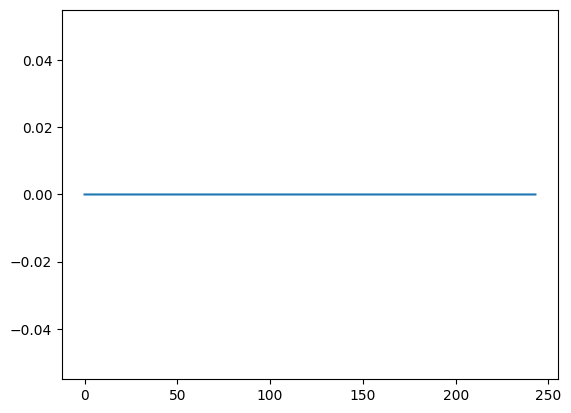

In [7]:
ts = np.arange(len(df)) / 500  # In seconds
plt.plot(ts, df['labels'])

In [8]:
len(header[27:])

34

In [9]:
header[27]

'R-TA'

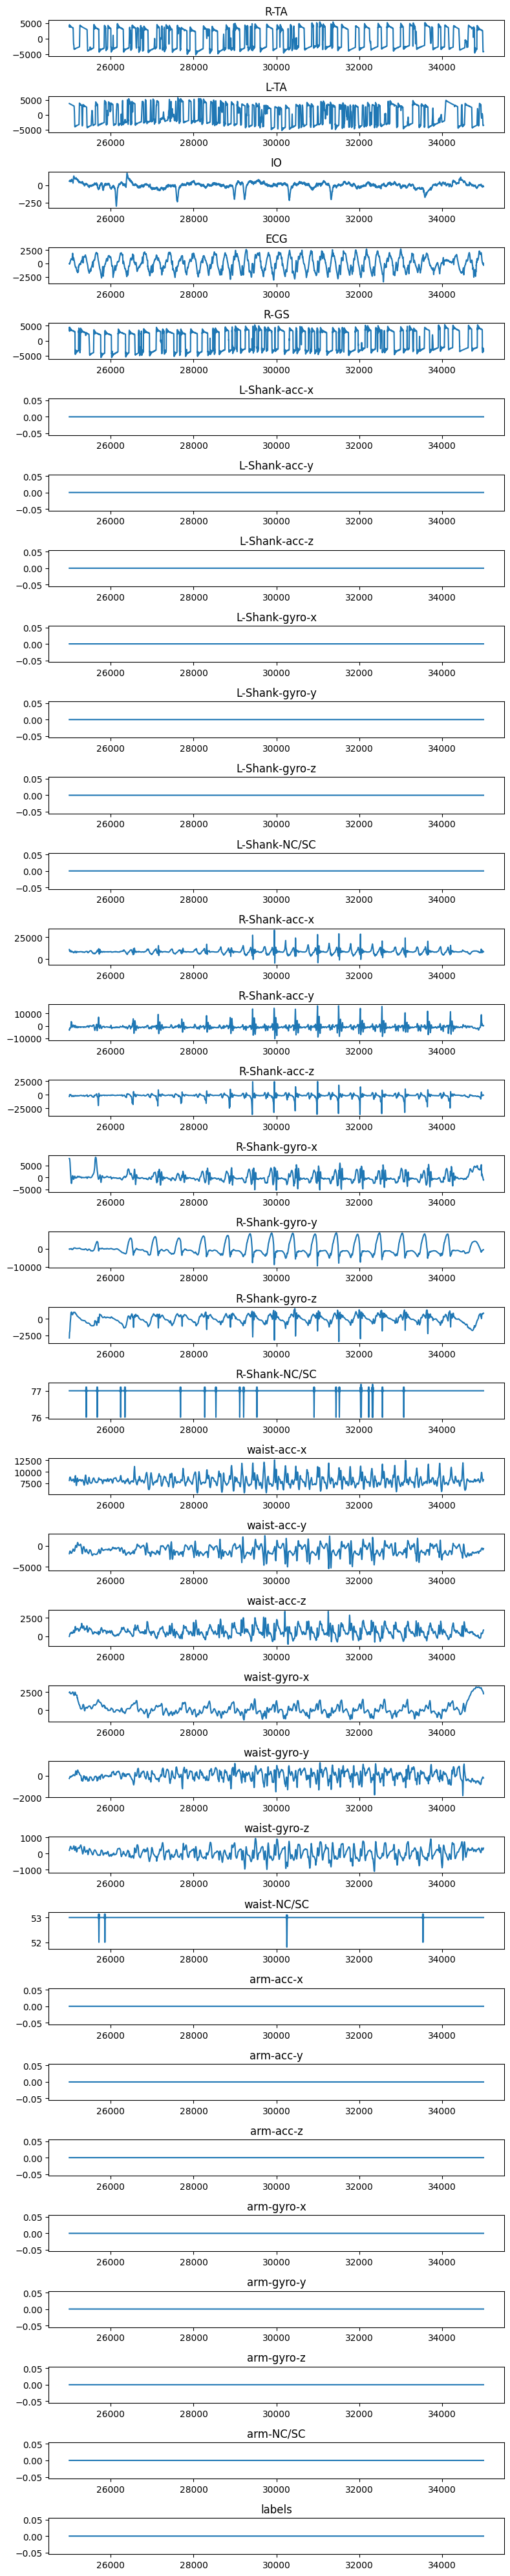

In [10]:
fig, axs = plt.subplots(34, 1, figsize=(8, 40))
for key, ax in zip(header[27:], axs):
    ax.plot(df[key][25000:35000])
    ax.set_title(key)
plt.tight_layout()